# Ozone

In [1]:
import matplotlib.pyplot as plt
from typhon import plots

import konrad


plots.styles.use()

## Fixed ozone distribution

In it's default configuration, konrad will keep a fixed vertical distribution of ozone following the RCEMIP protocol {cite:p}`wing18`.
As a consequence, no matter how the thermodynamic state of the atmosphere changes, the amount and distribution of ozone will stay the same.

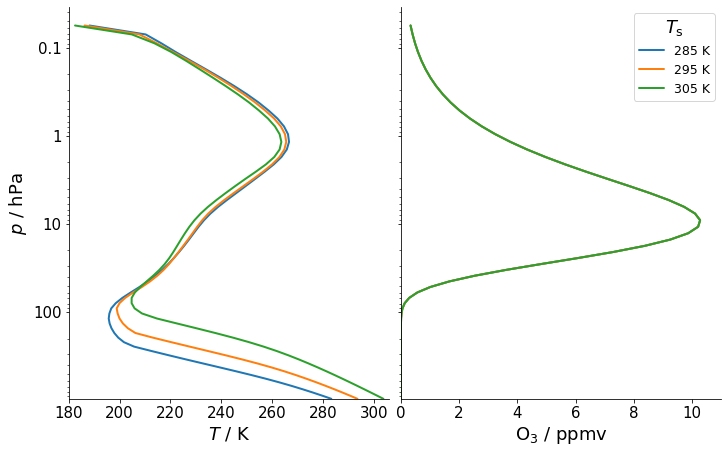

In [2]:
phlev = konrad.utils.get_quadratic_pgrid(top_pressure=5, num=64)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True)
for Ts in [285, 295, 305]:
    rce = konrad.RCE(
        atmosphere,
        surface=konrad.surface.FixedTemperature(temperature=Ts),
        timestep="12h",
        max_duration="150d",
    )
    rce.run()

    l, = plots.profile_p_log(atmosphere["plev"], atmosphere["T"][-1], ax=ax0)
    ax0.set_xlabel(r"$T$ / K")
    ax0.set_xlim(180, 306)
    ax0.set_ylabel("$p$ / hPa")
    ax0.set_ylim(bottom=atmosphere["plev"].max())

    plots.profile_p_log(
        atmosphere["plev"],
        atmosphere["O3"][-1] * 1e6,
        label=f"{Ts} K",
        color=l.get_color(),
        ax=ax1,
    )
    ax1.set_xlabel(r"$\rmO_3$ / ppmv")
    ax1.set_xlim(0, 11)
    ax1.legend(title=r"$T_\mathrm{s}$", fontsize="x-small")

## Linear ozone parameterization

In a warming climate, however, we expect the ozone concentration to change with the atmospheric temperature profile.
Konrad includes a linearized ozone scheme introduced by {cite:t}`cariolle07`.
This schemme accounts for the effect of a changing temperature profile.

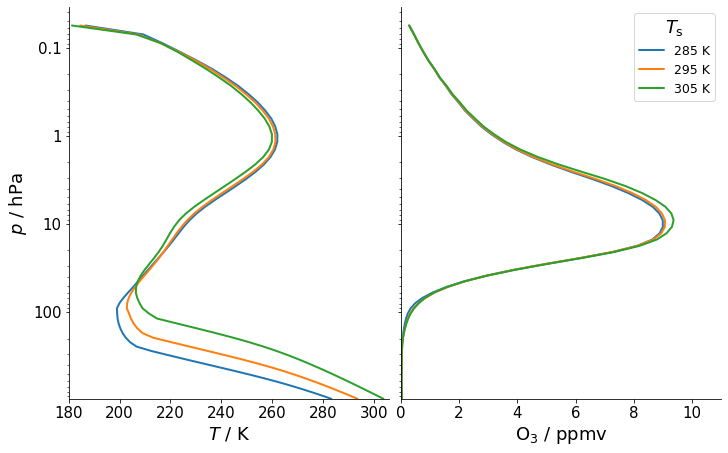

In [3]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True)

for Ts in [285, 295, 305]:
    rce = konrad.RCE(
        atmosphere,
        surface=konrad.surface.FixedTemperature(temperature=Ts),
        ozone=konrad.ozone.Cariolle(),
        timestep="2h",
        max_duration="150d",
    )
    rce.run()

    l, = plots.profile_p_log(atmosphere["plev"], atmosphere["T"][-1], ax=ax0)
    ax0.set_xlabel(r"$T$ / K")
    ax0.set_xlim(180, 306)
    ax0.set_ylabel("$p$ / hPa")
    ax0.set_ylim(bottom=atmosphere["plev"].max())

    plots.profile_p_log(
        atmosphere["plev"],
        atmosphere["O3"][-1] * 1e6,
        label=f"{Ts} K",
        color=l.get_color(),
        ax=ax1,
    )
    ax1.set_xlabel(r"$\rmO_3$ / ppmv")
    ax1.set_xlim(0, 11)
    ax1.legend(title=r"$T_\mathrm{s}$", fontsize="x-small")